In [ ]:
!pip install shap

In [ ]:
import shap
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# Download the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Reshape and normalize data
x_train = x_train.reshape(60000, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(10000, 28, 28, 1).astype("float32") / 255

In [ ]:

# Define the model architecture using the functional API
inputs = keras.Input(shape=(28, 28, 1))
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

# Create the model with the corresponding inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs, name="CNN")

# Compile the model
model.compile(
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      optimizer=keras.optimizers.Adam(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
  )

# Train it!
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.3655 - sparse_categorical_accuracy: 0.8690 - val_loss: 0.3184 - val_sparse_categorical_accuracy: 0.8875
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2465 - sparse_categorical_accuracy: 0.9099 - val_loss: 0.2679 - val_sparse_categorical_accuracy: 0.9016
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2004 - sparse_categorical_accuracy: 0.9268 - val_loss: 0.2750 - val_sparse_categorical_accuracy: 0.9015
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1658 - sparse_categorical_accuracy: 0.9388 - val_loss: 0.2527 - val_sparse_categorical_accuracy: 0.9110
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1371 - sparse_categorical_accuracy: 0.9488 - val_loss: 0.2468 - val_sparse_categorical_accuracy: 0.9167


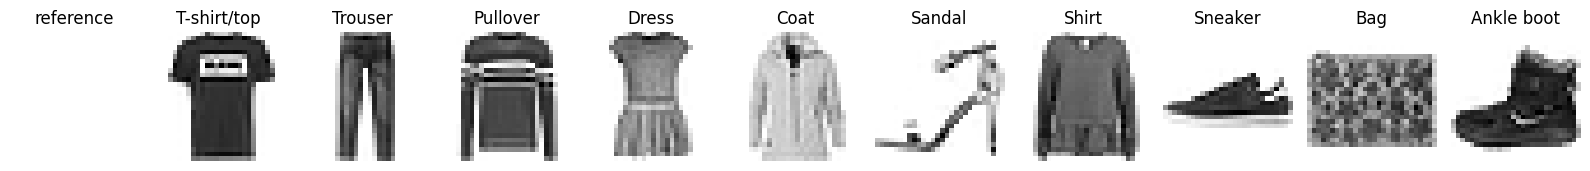

In [ ]:
# Name each one of the classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Save an example for each category in a dict
images_dict = dict()
for i, l in enumerate(y_train):
  if len(images_dict)==10:
    break
  if l not in images_dict.keys():
    images_dict[l] = x_train[i].reshape((28, 28))

# Function to plot images
def plot_categories(images):
  fig, axes = plt.subplots(1, 11, figsize=(16, 15))
  axes = axes.flatten()

  # Plot an empty canvas
  ax = axes[0]
  dummy_array = np.array([[[0, 0, 0, 0]]], dtype='uint8')
  ax.set_title("reference")
  ax.set_axis_off()
  ax.imshow(dummy_array, interpolation='nearest')

  # Plot an image for every category
  for k,v in images.items():
    ax = axes[k+1]
    ax.imshow(v, cmap=plt.cm.binary)
    ax.set_title(f"{class_names[k]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()


# Use the function to plot
plot_categories(images_dict)

In [ ]:
#we use the deepExplainer class from shap library for deep leaning model


#we take random sample of training images so that feature importance can be calculated from
#that data
background = x_train[np.random.choice(x_train.shape[0], 5000, replace=False)]


e = shap.DeepExplainer(model, background)

#this we do fr computing the shap values

#shap_values = e.shap_values(x_test[1])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
#len(shap_values)
#can properly visualize these values for each class

In [ ]:
# Save an example of each class from the test set
x_test_dict = dict()
for i, l in enumerate(y_test):
  if len(x_test_dict)==10:
    break
  if l not in x_test_dict.keys():
    x_test_dict[l] = x_test[i]

# Convert to list preserving order of classes
x_test_each_class = [x_test_dict[i] for i in sorted(x_test_dict)]

# Convert to tensor
x_test_each_class = np.asarray(x_test_each_class)

# Print shape of tensor
print(f"x_test_each_class tensor has shape: {x_test_each_class.shape}")

x_test_each_class tensor has shape: (10, 28, 28, 1)


In [ ]:

# Compute predictions
predictions = model.predict(x_test_each_class)

# Apply argmax to get predicted class
np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 136ms/step


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Compute shap values using DeepExplainer instance
shap_values = e.shap_values(x_test_each_class)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


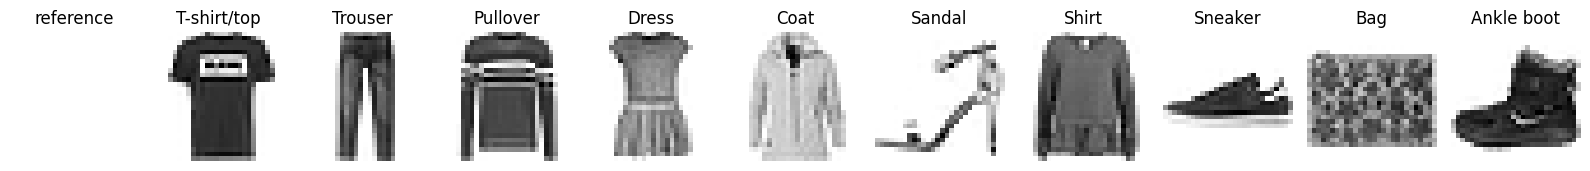

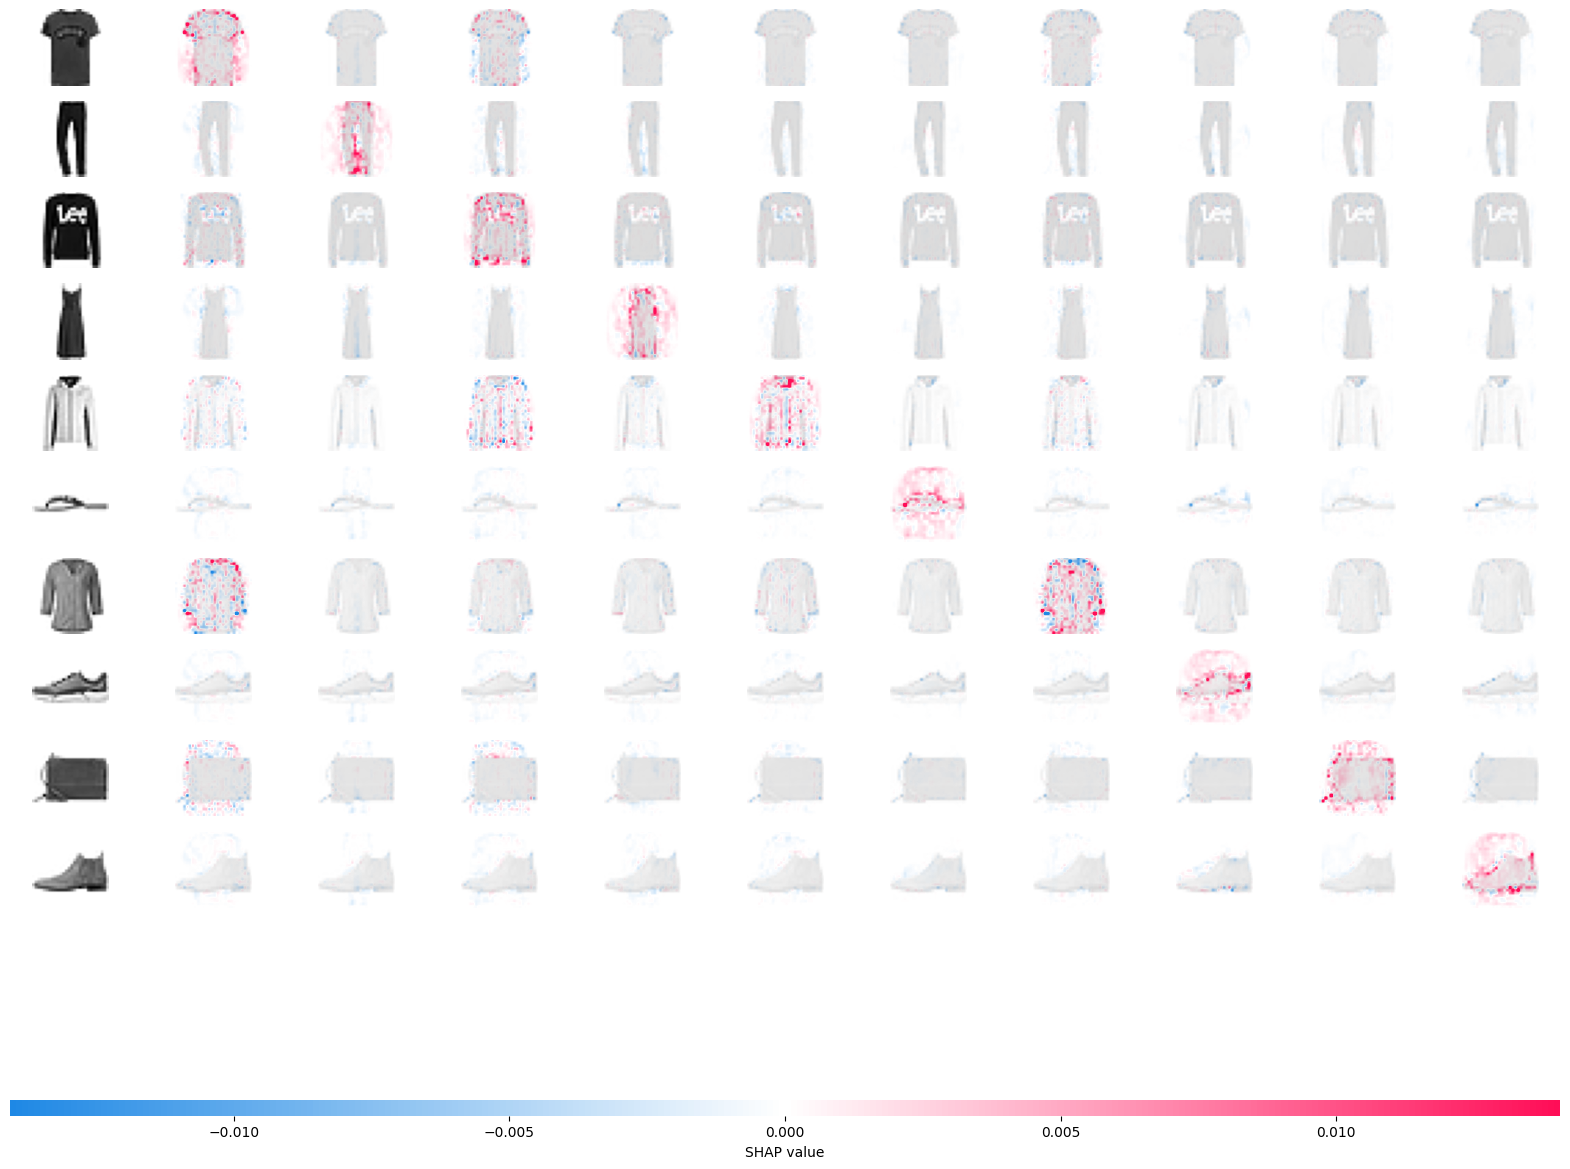

In [ ]:
# Plot reference column
plot_categories(images_dict)

# Print an empty line to separate the two plots
print()

# Plot shap values
shap.image_plot(shap_values, -x_test_each_class)

In [ ]:

# Save the probability of belonging to each class for the fifth element of the set
coat_probs = predictions[4]

# Order the probabilities in ascending order
coat_args = np.argsort(coat_probs)

# Reverse the list and get the top 3 probabilities
top_coat_args = coat_args[::-1][:3]

# Print (ordered) top 3 classes
for i in list(top_coat_args):
  print(class_names[i])

Coat
Pullover
Shirt
